In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers

In [22]:
# load data
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [23]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [24]:
y_train[0]

9

In [25]:
# Set label
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

class_nums = len(class_name)
class_nums

10

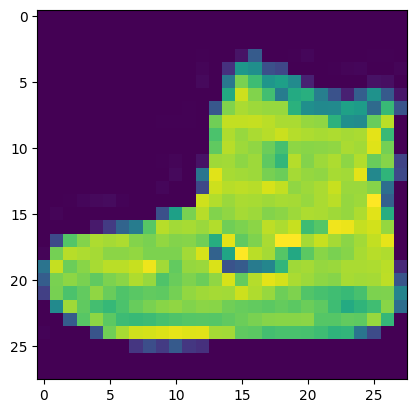

In [26]:
plt.imshow(X_train[0])

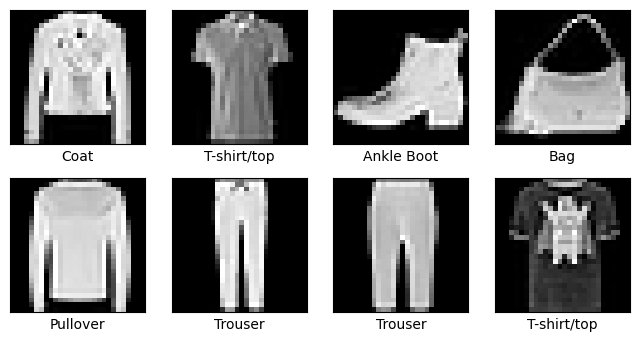

In [27]:
# Visualize random image
def plot_data(X_data: np.ndarray, y_data: np.ndarray) -> None:
  nrows, ncols = 2,4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  len_x = X_data.shape[0]
  for idx in  range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0,len_x)
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(class_name[y_data[img_idx]], color="black")

    ax.imshow(X_data[img_idx], cmap="gray")

plot_data(X_train, y_train)

In [28]:
# Encoding dataset
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [29]:
X_train.dtype, X_test.shape

(dtype('float32'), (10000, 28, 28))

In [30]:
# Add chanel ti X_train and X_test
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [31]:
X_train.shape

(60000, 28, 28, 1)

In [32]:
# Category target
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [33]:
y_train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
# Train model
input_shape = (28,28,1)
model = keras.models.Sequential([
  layers.Flatten(input_shape=input_shape),
  layers.Dense(512, activation="relu"),
  layers.Dense(256, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(class_nums, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [36]:
X_train.shape, y_train_label.shape

((60000, 28, 28, 1), (60000, 10))

In [37]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1
          )

Epoch 1/10
422/422 [==============================] - 7s 15ms/step - loss: 1.0525 - accuracy: 0.6865 - val_loss: 0.6631 - val_accuracy: 0.7855
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.6051 - accuracy: 0.7985 - val_loss: 0.5583 - val_accuracy: 0.8060
Epoch 3/10
422/422 [==============================] - 5s 12ms/step - loss: 0.5251 - accuracy: 0.8195 - val_loss: 0.4938 - val_accuracy: 0.8300
Epoch 4/10
422/422 [==============================] - 6s 14ms/step - loss: 0.4883 - accuracy: 0.8290 - val_loss: 0.4671 - val_accuracy: 0.8372
Epoch 5/10
422/422 [==============================] - 5s 11ms/step - loss: 0.4628 - accuracy: 0.8395 - val_loss: 0.4501 - val_accuracy: 0.8408
Epoch 6/10
422/422 [==============================] - 6s 14ms/step - loss: 0.4435 - accuracy: 0.8448 - val_loss: 0.4338 - val_accuracy: 0.8408
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.4281 - accuracy: 0.8496 - val_loss: 0.4277 - val_accuracy: 0.8442

In [38]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test_label)
print("Loss = {0}".format(test_loss))
print("Accuracy = {0}".format(test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.4305 - accuracy: 0.8445
Loss = 0.43049687147140503
Accuracy = 0.8445000052452087


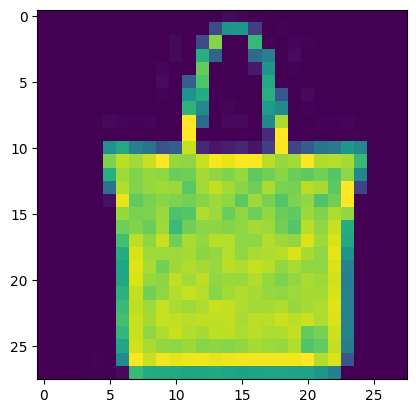

In [45]:
# Making a prediction on new data
n = random.randint(0, 9999)
plt.imshow(X_test[n])
plt.show()

In [46]:
# We use predict() on new data
predicted_value = model.predict(X_test)
print("The image is: {0}".format(class_name[np.argmax(predicted_value[n])]))
history.history.keys()

313/313 [==============================] - 1s 3ms/step
The image is: Bag


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

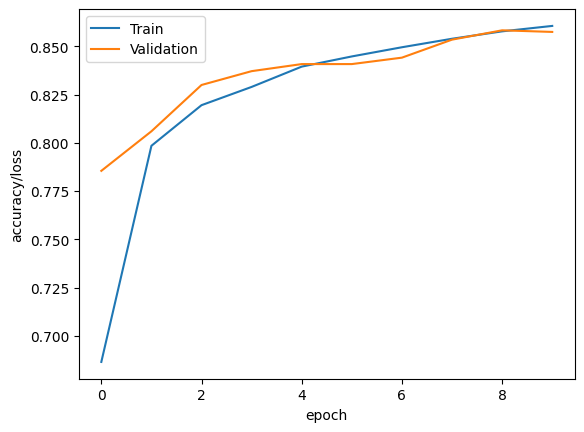

In [47]:
# Graph representing the model's accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy/loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

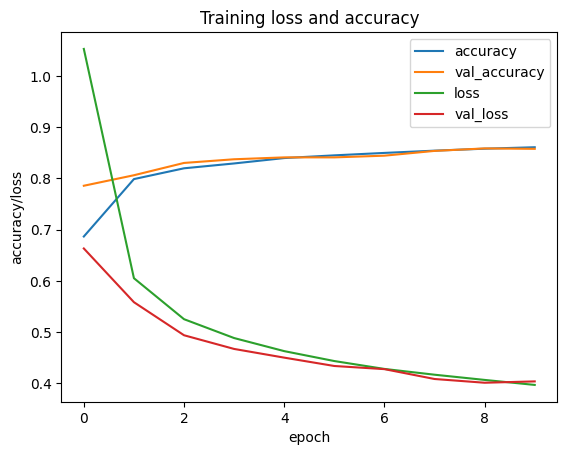

In [48]:
# Graph representing the model's accuracy and model's loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training loss and accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy/loss")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"])
plt.show()